In [96]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [97]:
# Read the dataset
df = pd.read_csv("datasets/Advertising.csv", header=0)
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [98]:
# Drop unnecessary columns
df = df.drop(columns=["Unnamed: 0"])

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [100]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [101]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

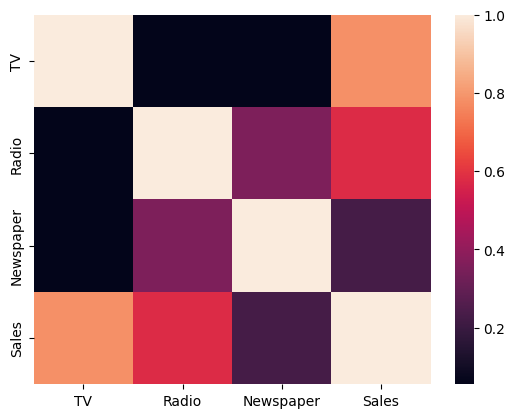

In [102]:
# Correlation matrix
heatmap_data = df.corr()
sns.heatmap(heatmap_data)
plt.show()

Text(0, 0.5, 'Sales')

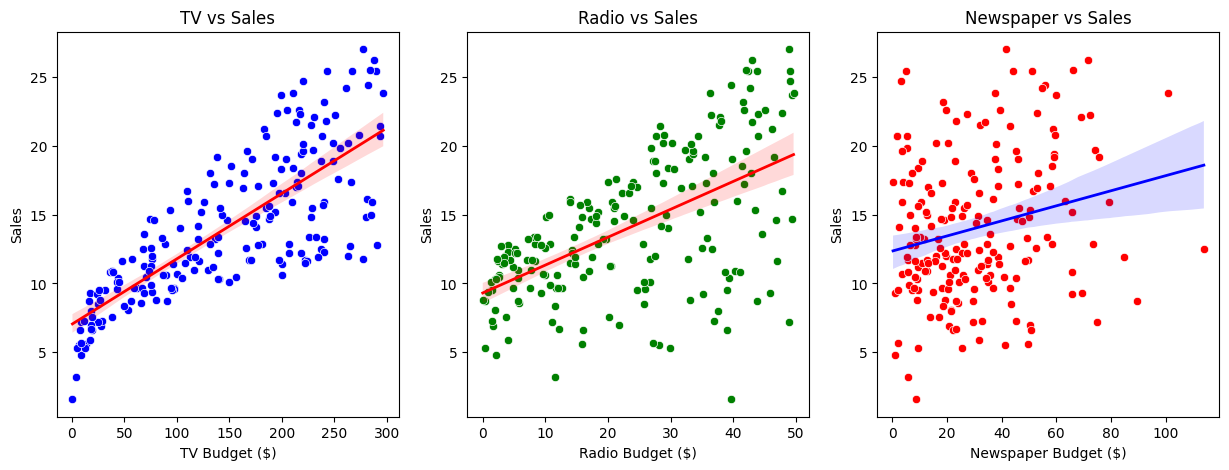

In [127]:
plt.figure(figsize=(15, 5))

# Scatter plot for TV vs Sales
plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=df, color='blue')
sns.regplot(x='TV', y='Sales', data=df, scatter=False, color='red', line_kws={'linewidth': 2})
plt.title('TV vs Sales')
plt.xlabel('TV Budget ($)')
plt.ylabel('Sales')

# Scatter plot for Radio vs Sales
plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=df, color='green')
sns.regplot(x='Radio', y='Sales', data=df, scatter=False, color='red', line_kws={'linewidth': 2})
plt.title('Radio vs Sales')
plt.xlabel('Radio Budget ($)')
plt.ylabel('Sales')

# Scatter plot for Newspaper vs Sales
plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=df, color='red')
sns.regplot(x='Newspaper', y='Sales', data=df, scatter=False, color='blue', line_kws={'linewidth': 2})
plt.title('Newspaper vs Sales')
plt.xlabel('Newspaper Budget ($)')
plt.ylabel('Sales')

In [103]:
# Import the necessary modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [104]:
# Initialize objects
ridge = Ridge()
scaler = StandardScaler()

In [105]:
# Assign independent and dependent values
X = df.drop(columns=["Sales"])
y = df.loc[:, "Sales"]

In [106]:
# Train Test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [116]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [118]:
ridge.fit(X_train_scaled, y_train)

Ridge()

In [119]:
y_pred = ridge.predict(X_test_scaled)

In [120]:
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

In [121]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"R2 score: {r2} \n MSE: {mse} \n RMSE: {rmse}")

R2 score: 0.9102342828246703 
 MSE: 2.879540581837094 
 RMSE: 1.6969209120748951


In [123]:
import pickle

In [125]:
# Save the scaler
with open('models/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Save the Ridge regression model
with open('models/ridge_model.pkl', 'wb') as model_file:
    pickle.dump(ridge, model_file)
